In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fit_rate(x, a,b):
    return 1/2+1/2*np.exp(-a*(x-b))

In [46]:
ts = np.linspace(0,20, 1000)
def func(t, a):
    return 1/2+1/2*np.exp(-t*a)

In [61]:
a = 0.5
y = func(ts, a)
num_popt, num_pcov = curve_fit(fit_rate, ts, y)
es1 = num_popt[0]

th = ts[np.argmin((y -0.75)**2)]
es2 = np.log(2)/th

t_r_tests = np.linspace(0.001,1, 100)

def opti_me(ts,y,r):
    delta_t = ts[1]-ts[0]
    t_r = np.log(2)/r
    if 0 in ts:
        s0 = y[ts == 0] * 1/t_r
    else:
        s0 = 0
    y = y[ts > 0]
    ts = ts[ts > 0]
    return delta_t*(s0 + np.sum(y[None,:]/ts[None,:] * np.sin(ts[None,:]/t_r[:,None]), axis = 1)) - np.pi / 4

0.06154545454545455

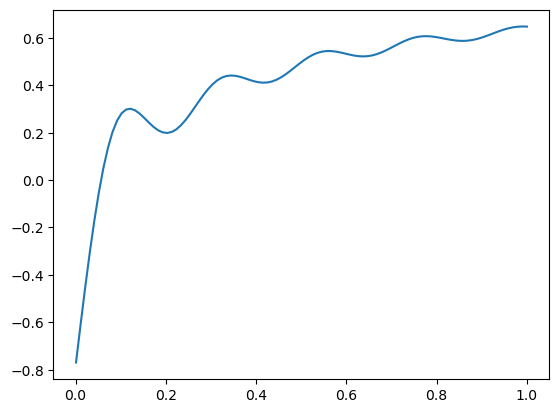

In [62]:
plt.plot(t_r_tests,opti_me(ts,y, t_r_tests))
t_r_tests[np.argmin(opti_me(ts,y, t_r_tests)**2)]

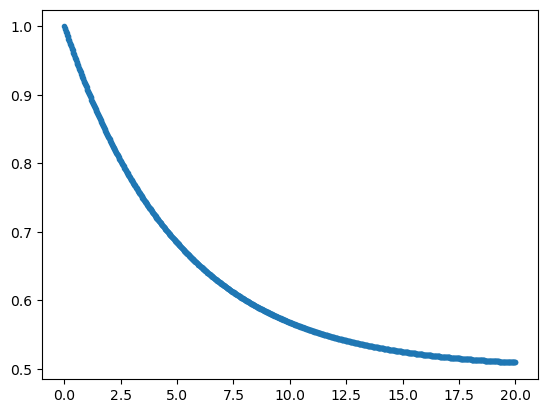

In [49]:
plt.plot(ts, y,'.-')

In [50]:
es1/a, es2/a

(1.0000000062146202, 1.0006561176002677)

$e^{-a t} = 1/2$

$-a t = ln(1/2)$

$a = ln(2)/t$

$K(t_r) = 1/2$

$e^{-a*t_r} = 1/2$

$-a*t_r = ln(1/2)$

$t_r = ln(2)/a$